In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
from scipy import optimize, stats

https://stackoverflow.com/questions/78619620/possible-to-see-estimated-parameter-array-of-curve-fit-function-used-to-calculat

In [2]:
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2, 4, 9, 16, 25])

def model(x, a, b):
    return a * np.exp(- b * x)

In [3]:
popt, pcov = optimize.curve_fit(model, x_data, y_data, absolute_sigma=True)
popt, pcov

(array([ 1.6726804 , -0.54517096]),
 array([[0.0919559 , 0.0117965 ],
        [0.0117965 , 0.00156188]]))

In [4]:
def loss_factory(x, y):
    def wrapped(p):
        return 0.5 * np.sum(np.power(y - model(x, *p), 2))
    return wrapped

In [5]:
loss = loss_factory(x_data, y_data)

In [6]:
sol = optimize.minimize(loss, x0=[1., -1.])
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.8128954064320124
        x: [ 1.673e+00 -5.452e-01]
      nit: 26
      jac: [-1.490e-06  8.389e-06]
 hess_inv: [[ 8.511e-02  1.089e-02]
            [ 1.089e-02  1.443e-03]]
     nfev: 129
     njev: 43

In [7]:
H = nd.Hessian(loss)(sol.x)
C = np.linalg.inv(H)
C 

array([[0.08518073, 0.01089965],
       [0.01089965, 0.00144316]])

In [8]:
np.random.seed(123456)
x = np.linspace(-1, 1, 3000)
p = (2.5, 1.2)
y = model(x, *p)
s = 0.1 * np.ones_like(x)
n = s * np.random.normal(size=x.size)
yn = y + n

In [9]:
def loss_factory(x, y, s):
    def wrapped(p):
        return 0.5 * np.sum(np.power((y - model(x, *p)) / s, 2))
    return wrapped

In [10]:
loss = loss_factory(x, yn, s)

In [11]:
popt, pcov = optimize.curve_fit(model, x, yn, sigma=s, absolute_sigma=True)
popt, pcov

(array([2.50042509, 1.19873061]),
 array([[ 5.22097958e-06, -2.50399907e-06],
        [-2.50399907e-06,  1.66936758e-06]]))

In [12]:
sol = optimize.minimize(loss, x0=[1., 1.], tol=1e-4)
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1554.9574613298098
        x: [ 2.500e+00  1.199e+00]
      nit: 11
      jac: [-9.155e-05 -4.578e-05]
 hess_inv: [[ 5.208e-06 -2.497e-06]
            [-2.497e-06  1.666e-06]]
     nfev: 60
     njev: 20

In [13]:
H = nd.Hessian(loss)(sol.x)
C = np.linalg.inv(H)
C

array([[ 5.22047492e-06, -2.50366278e-06],
       [-2.50366278e-06,  1.66914356e-06]])

In [14]:
yhat = model(x, *popt)

In [15]:
residuals = yn - yhat

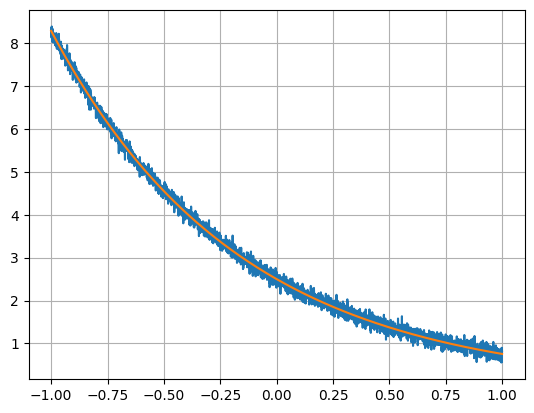

In [16]:
fig, axe = plt.subplots()
axe.plot(x, yn)
axe.plot(x, yhat)
axe.grid()

In [17]:
p = stats.norm.fit(residuals)
p

(-3.506208994573257e-05, 0.10181543029512476)

In [18]:
law = stats.norm(*p)

In [19]:
rlin = np.linspace(residuals.min(), residuals.max(), 200)

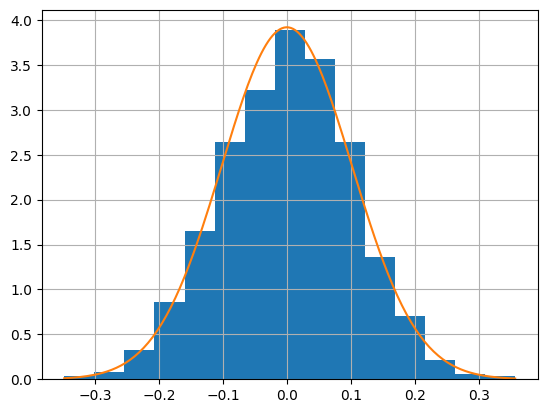

In [20]:
fig, axe = plt.subplots()
axe.hist(residuals, 15, density=1.)
axe.plot(rlin, law.pdf(rlin))
axe.grid()